In [1]:
import numpy as np
import pandas as pd

In [2]:
# We'll need 2 samples of the data. One for building a specific model and one for building just a general.

data = pd.read_csv('https://pkgstore.datahub.io/core/sea-level-rise/csiro_alt_gmsl_mo_2015_csv/data/dc258c2039d8b640f74efd3d23e1c920/csiro_alt_gmsl_mo_2015_csv.csv')
df = pd.read_csv('https://pkgstore.datahub.io/core/sea-level-rise/csiro_alt_gmsl_mo_2015_csv/data/dc258c2039d8b640f74efd3d23e1c920/csiro_alt_gmsl_mo_2015_csv.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
Time    266 non-null object
GMSL    266 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [4]:
data

,Time,GMSL
0,1993-01-15,-1.6
1,1993-02-15,-3.4
2,1993-03-15,5.5
3,1993-04-15,0.1
4,1993-05-15,5.3
5,1993-06-15,0.2
6,1993-07-15,3.9
7,1993-08-15,0.2
8,1993-09-15,3.1
9,1993-10-15,-0.1


In [5]:
# Bytheway 'GMSL' stands for 'Global Mean Sea Level' and its unity is 'mm' (millimeter)

In [6]:
# In our data we have a feature called Time and it gives the exact date (I mean by that date, the month, the year).
# But We just need the year and to fix that we're going to use RegEx (Regular Expressions).

import re

In [7]:
Date = list(data.Time)
for i in range(data.shape[0]):
    result = re.split('-', Date[i])
    data.iloc[i,0] = result[0]
    
data.Time = data.Time.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
Time    266 non-null int32
GMSL    266 non-null float64
dtypes: float64(1), int32(1)
memory usage: 3.2 KB


In [8]:
# We have to convert the 'df.Time' from 'object' to 'datetime'

from datetime import datetime

Date = list(df.Time)

for i in range(df.shape[0]):
    df.Time[i] = Date[i]
    df.Time[i] = datetime.strptime(df.Time[i], '%Y-%m-%d')

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
# Now let's move to visualization with matplotlib

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rc('lines', linewidth=4)

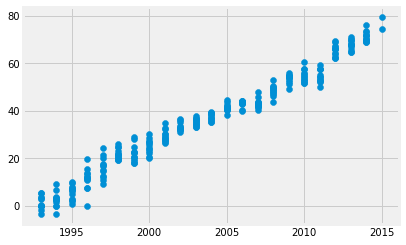

In [10]:
plt.scatter(data.Time, data.GMSL)
plt.show()

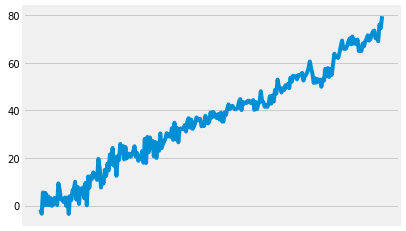

In [11]:
# We've removed the 'x' ticks. Otherwise, it'll create a mess

plt.plot(df.Time, df.GMSL)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [12]:
# Now we have to plot the best fit slope to know wheter the data has a linear relationship or not.

def best_fit_slope_and_intercept(xs, ys):
    m = ( (np.mean(xs) * np.mean(ys) - np.mean(xs*ys)) /
          (np.mean(xs) * np.mean(xs) - np.mean(xs*xs)))
    b = np.mean(ys) - m*np.mean(xs)
    return m,b

m,b = best_fit_slope_and_intercept(data.Time, data.GMSL)

print(m,b)

regression_line = [(m*x) + b for x in data.Time]

3.215888927583719 -6407.282960569374


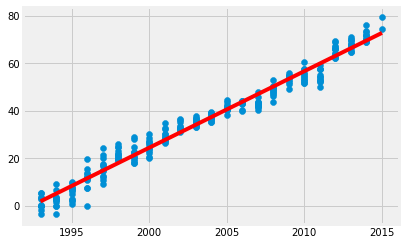

In [13]:
plt.scatter(data.Time, data.GMSL)
plt.plot(data.Time, regression_line, c='r')
plt.show()

In [14]:
# Let's move machine learning and modelling.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 

In [15]:
reg = LinearRegression()
x = np.array(data.iloc[:, 0]).reshape(-1, 1)
y = np.array(data.iloc[:, 1]).reshape(-1, 1)
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# let's move to test our model.

test = np.array([[2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]]).reshape(-1, 1)
reg.predict(test)

array([[ 88.81267315],
       [ 92.02856208],
       [ 95.244451  ],
       [ 98.46033993],
       [101.67622886],
       [104.89211779],
       [108.10800671],
       [111.32389564],
       [114.53978457],
       [117.7556735 ],
       [120.97156242]])